In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from functions import dataToTimeSeries

In [2]:
df = pd.read_csv("./tags/tag_values.csv")

In [3]:
df

,DateTime,GLA3_CO_258_024,GLA3_CO_258_028,GLA3_CO_258_032
0,2022-01-01 00:00:00.000,-73.820892,0.126587,-2.549911
1,2022-01-01 00:00:05.551,-73.748550,NaN,NaN
2,2022-01-01 00:00:10.000,NaN,0.307434,-2.839264
3,2022-01-01 00:00:11.573,NaN,NaN,-2.676498
4,2022-01-01 00:00:20.000,-73.640045,0.307434,-2.640335
...,...,...,...,...
6670571,2022-12-31 23:59:48.621,-1.808456,NaN,NaN
6670572,2022-12-31 23:59:50.000,NaN,-0.397858,-4.593460
6670573,2022-12-31 23:59:51.631,-1.736115,NaN,NaN
6670574,2022-12-31 23:59:54.642,-1.718033,NaN,NaN


In [5]:
df[df['GLA3_CO_258_024'] > 150].count()

DateTime           18675
GLA3_CO_258_024    18675
GLA3_CO_258_028     8151
GLA3_CO_258_032     8227
dtype: int64

In [ ]:
df[df['GLA3_CO_258_024']].count()

In [6]:
dw = pd.read_csv("./dataframes/downtimes_2022_ms.csv")

In [7]:
dw = dw.drop(columns='ToTime').rename(columns={'FromTime':'DateTime'})

In [8]:
dw['DateTime'] = pd.to_datetime(dw['DateTime'])

In [9]:
dw.set_index('DateTime', inplace=True)

In [7]:
dw

,downtime
DateTime,
2022-01-03 10:00:00,1
2022-01-03 10:00:01,1
2022-01-03 10:00:02,1
2022-01-03 10:00:03,1
2022-01-03 10:00:04,1
...,...
2022-12-23 18:59:56,0
2022-12-23 18:59:57,0
2022-12-23 18:59:58,0


In [10]:
data = pd.read_csv("./dataframes/clean_data.csv")

In [11]:
data = data[data['MsgNr'].isin([11225,11231])]
data['alarm_11225'] = data['MsgNr'].apply(lambda x: 1 if x == 11225 else 0)
data['alarm_11231'] = data['MsgNr'].apply(lambda x: 1 if x == 11231 else 0)
data = data[['DateTime', 'alarm_11225', 'alarm_11231']]
data.head()

,DateTime,alarm_11225,alarm_11231
34,2022-01-03 13:12:54,0,1
58,2022-01-03 21:16:02,0,1
104,2022-01-04 00:54:42,0,1
109,2022-01-04 01:32:16,0,1
112,2022-01-04 01:48:31,0,1


In [9]:
data[data['DateTime'] == '2022-02-22 16:24:59']

,DateTime,alarm_11225,alarm_11231
36534,2022-02-22 16:24:59,1,0
36535,2022-02-22 16:24:59,1,0


In [12]:
data_ts = dataToTimeSeries(data)
data = data_ts.alarmTransform()

In [11]:
data[:30]

,alarm_11225,alarm_11231
DateTime,,
2022-01-03 13:12:54,0.0,1.0
2022-01-03 13:12:55,NaN,NaN
2022-01-03 13:12:56,NaN,NaN
2022-01-03 13:12:57,NaN,NaN
2022-01-03 13:12:58,NaN,NaN
2022-01-03 13:12:59,NaN,NaN
2022-01-03 13:13:00,NaN,NaN
2022-01-03 13:13:01,NaN,NaN
2022-01-03 13:13:02,NaN,NaN


In [8]:
# above_value = df['GLA3_CO_258_032'] > 25

In [9]:
# filtered = df.loc[above_value]

In [10]:
# filtered

,DateTime,GLA3_CO_258_024,GLA3_CO_258_028,GLA3_CO_258_032
33749,2022-01-03 14:13:00.000,-10.091141,3.146698,30.454285
33750,2022-01-03 14:13:10.000,17.740875,4.774307,32.244659
38398,2022-01-04 02:32:20.000,-10.488998,-6.492340,25.444885
38532,2022-01-04 02:53:30.000,-4.394531,1.862701,26.728882
38533,2022-01-04 02:53:40.000,-8.716721,0.904221,25.824646
...,...,...,...,...
6544625,2022-12-28 15:21:30.000,NaN,-0.705292,81.108948
6545215,2022-12-28 15:44:50.000,NaN,-0.687210,33.926514
6545217,2022-12-28 15:45:00.000,NaN,-0.741470,30.056427
6545233,2022-12-28 15:45:40.000,NaN,-0.904221,46.983521


In [12]:
# df_11225 = pd.read_csv("./alarms_data/11225.csv")
# df_11231 = pd.read_csv("./alarms_data/11231.csv")

In [13]:
# df_11231.head()

In [14]:
# df.shape

In [13]:
from functions import dataToTimeSeries
data_ts =dataToTimeSeries(df)
df = data_ts.transformToSeconds()

In [29]:
# data_11225 =dataToTimeSeries(df_11225)
# df_11225 = data_11225.transform()

# data_11231 =dataToTimeSeries(df_11231)
# df_11231 = data_11225.transform()

In [30]:
# df_11225 = df_11225.drop(['MsgNr'], axis=1).rename(columns={"all_alarms":"alarm_1125"})
# df_11231 = df_11231.drop(['MsgNr'], axis=1).rename(columns={"all_alarms":"alarm_11231"})
# df_alarms = df_11225.merge(df_11231, left_index = True, right_index= True, how="outer").fillna(0)

In [33]:
# df = data.merge(df_alarms, left_index=True, right_index=True, how="left")

In [42]:
# df['alarm_1125'].fillna(0, inplace=True)
# df['alarm_11231'].fillna(0, inplace=True)

MemoryError: Unable to allocate 241. MiB for an array with shape (1, 31536001) and data type float64

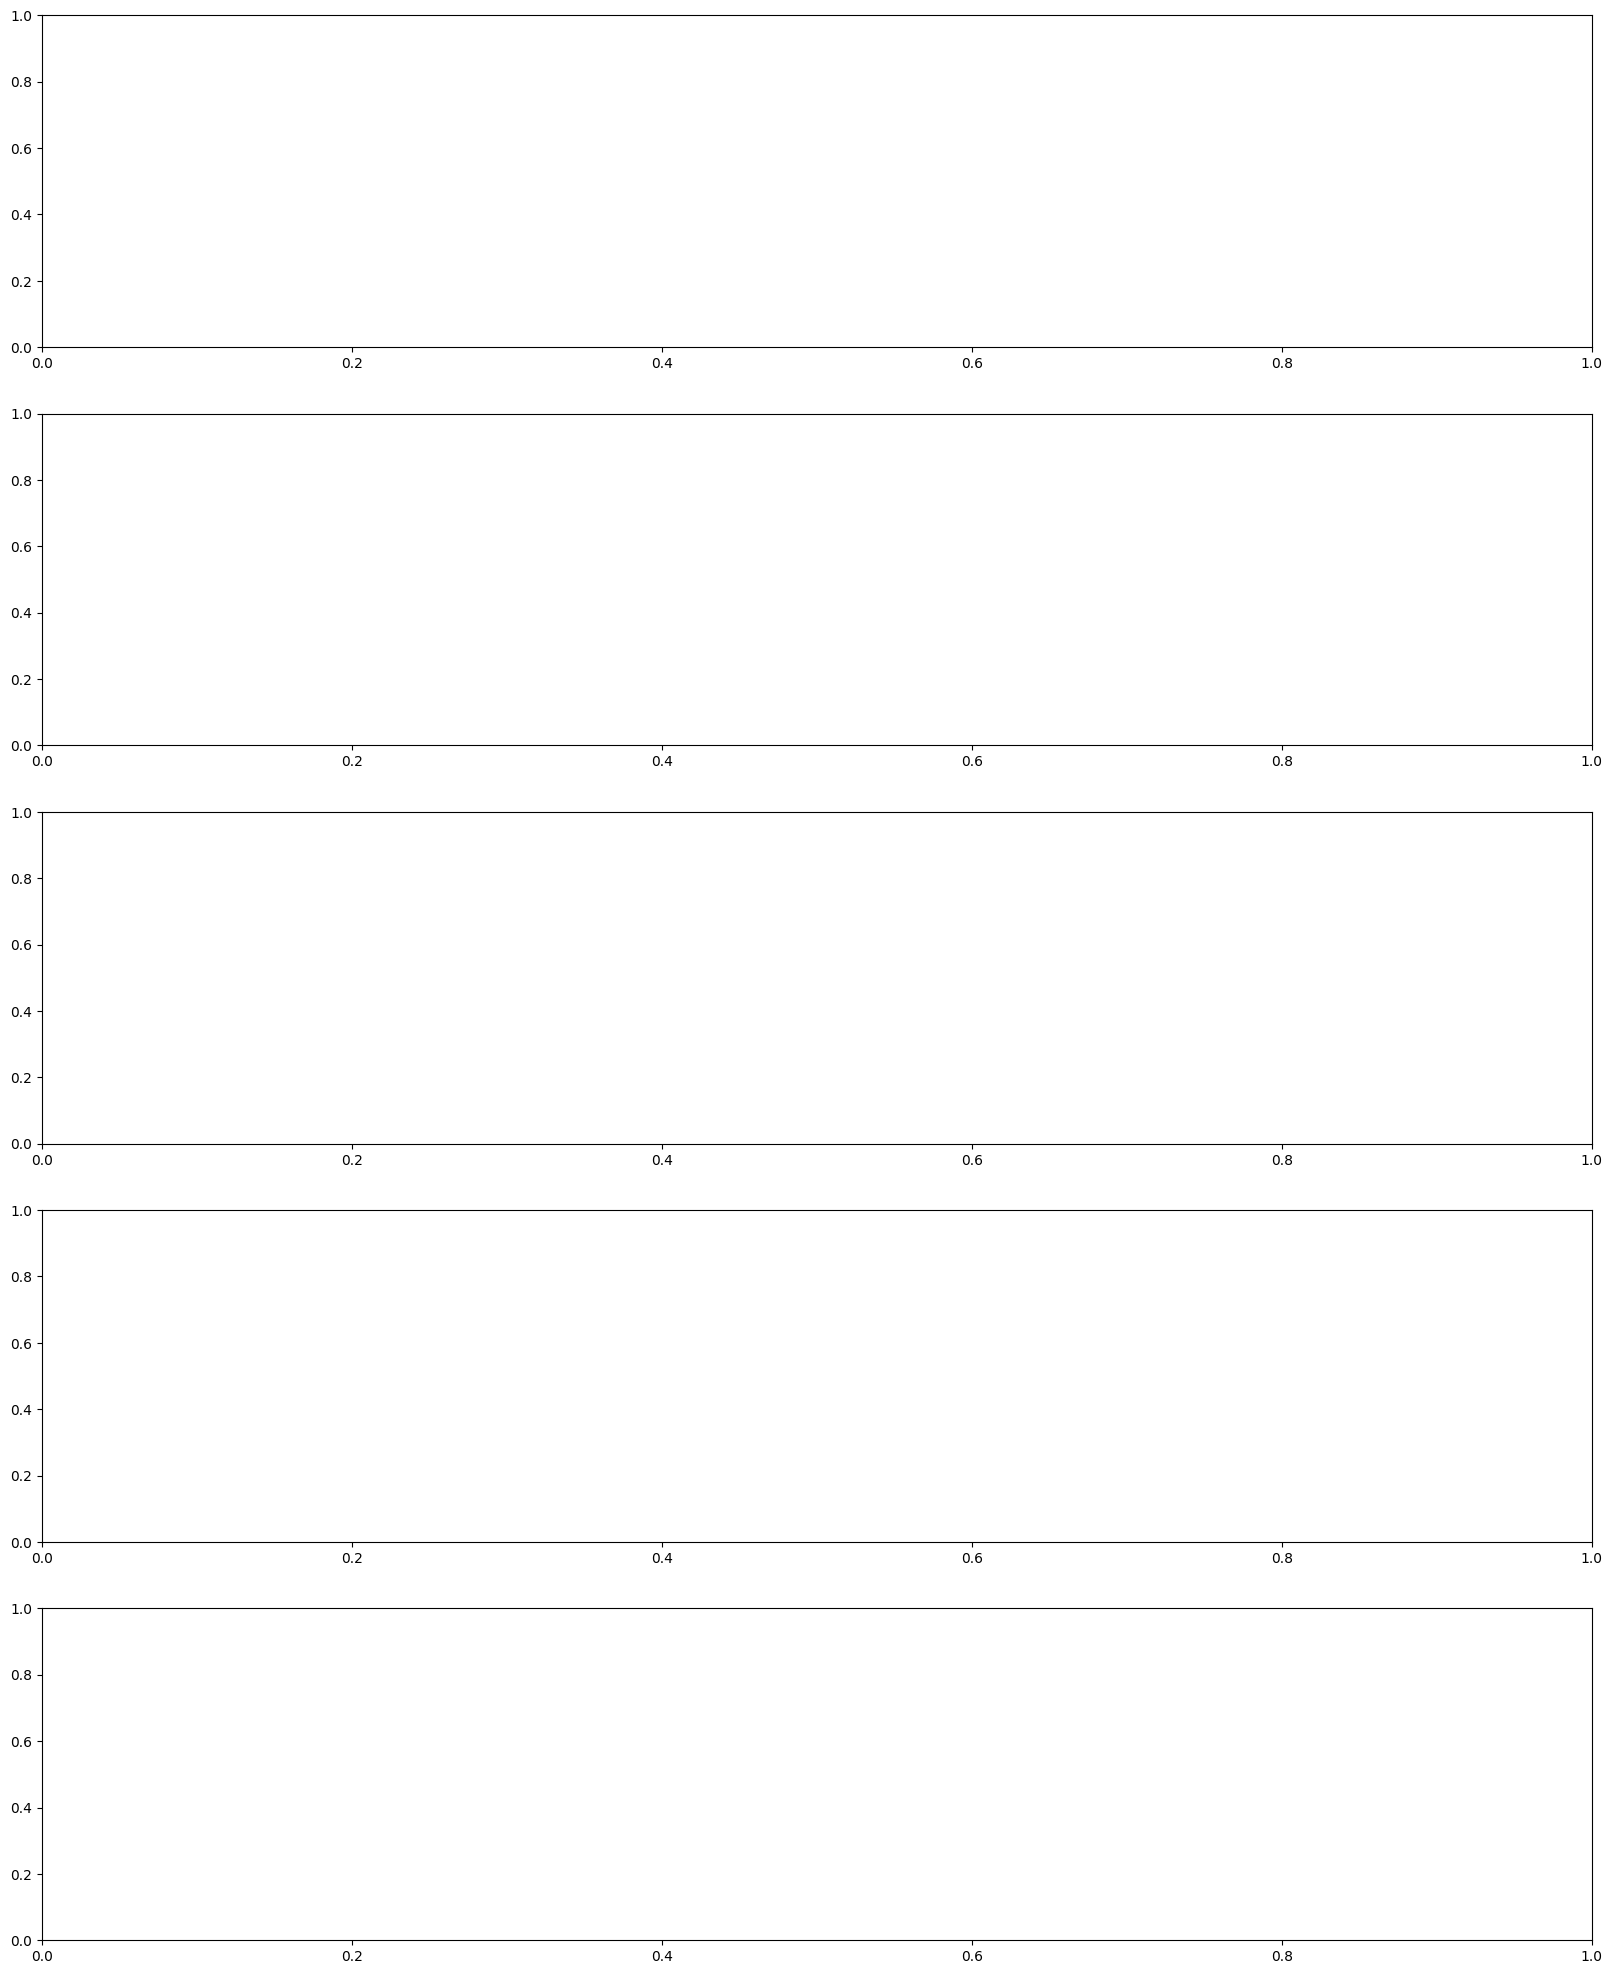

In [44]:
# fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=(20,25))
# df['GLA3_CO_258_024'].plot(ax =ax1)
# df['GLA3_CO_258_028'].plot(ax=ax2)
# df['GLA3_CO_258_032'].plot(ax=ax3)
# df['alarm_1125'].plot(ax =ax4)
# df['alarm_11231'].plot(ax=ax5)

In [13]:
data = data[data.index < pd.Timestamp("2023-01-01 00:00:00")]
data

,alarm_11225,alarm_11231
DateTime,,
2022-01-03 13:12:54,0.0,1.0
2022-01-03 13:12:55,NaN,NaN
2022-01-03 13:12:56,NaN,NaN
2022-01-03 13:12:57,NaN,NaN
2022-01-03 13:12:58,NaN,NaN
...,...,...
2022-12-31 23:59:55,NaN,NaN
2022-12-31 23:59:56,NaN,NaN
2022-12-31 23:59:57,NaN,NaN


In [14]:
dataframe = df.merge(dw, left_index= True, right_index= True, how="left")

In [16]:
dataframe = dataframe.merge(data, left_index= True, right_index= True, how="left")

In [17]:
dataframe

,GLA3_CO_258_024,GLA3_CO_258_028,GLA3_CO_258_032,downtime,alarm_11225,alarm_11231
DateTime,,,,,,
2022-01-01 00:00:00,-73.820892,0.126587,-2.549911,NaN,NaN,NaN
2022-01-01 00:00:01,-73.820892,0.126587,-2.549911,NaN,NaN,NaN
2022-01-01 00:00:02,-73.820892,0.126587,-2.549911,NaN,NaN,NaN
2022-01-01 00:00:03,-73.820892,0.126587,-2.549911,NaN,NaN,NaN
2022-01-01 00:00:04,-73.820892,0.126587,-2.549911,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-12-31 23:59:56,-1.718033,-0.397858,-4.593460,NaN,NaN,NaN
2022-12-31 23:59:57,-1.718033,-0.397858,-4.593460,NaN,NaN,NaN
2022-12-31 23:59:58,-1.718033,-0.397858,-4.593460,NaN,NaN,NaN


In [18]:
dataframe.to_csv('./dataframes/data_preprocessed_seconds.csv')